This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: 1b192b93-a49d-11ed-9d0f-ff2f3c16546c


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

In [32]:
# importing packages

import pandas as pd
import numpy as np
import random
from scipy.stats import skew, kurtosis, entropy

import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import pathlib
import os
from glob import glob

### Importing the data

In [33]:
#Defining lists containing random 100 image paths from each file
arborio = random.sample(glob('../data/Arborio/*'), 100)
basmati = random.sample(glob('../data/Basmati/*'), 100)
jasmine = random.sample(glob('../data/Jasmine/*'), 100)

In [34]:
# Defining the DataFrame containing image paths and lables
data_dict = {'Arborio' : arborio, 'Basmati' : basmati,'Jasmine' : jasmine}

df_list = []

for class_label, file_paths in data_dict.items():
    for file_path in file_paths:
        df_list.append({'File Path': file_path, 'Class Label': class_label})

df = pd.concat([pd.DataFrame(df_list)], axis=0, ignore_index=True)

In [35]:
X, y = [], []

for index, row in df.iterrows():
    file_path = row['File Path']
    class_label = row['Class Label']
    
    img = cv2.imread(str(file_path))
    resized_img = cv2.resize(img, (224, 224))
    X.append(resized_img)
    y.append(class_label)

X = np.array(X)
y = np.array(y)

### Determine the contour of each rice

In [36]:
all_contours = []
for idx, image in enumerate(X):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    all_contours.append(contours)

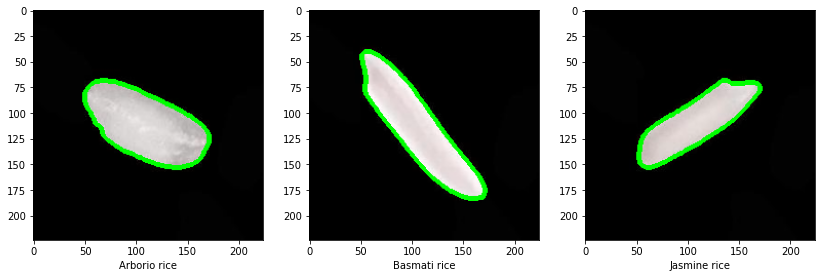

In [37]:
# show contours of each specie of rice
# since the images are in order based on each class we will take the first image in every 100 images

fig, ax = plt.subplots(1,3, figsize = (14,14))

indices = [0,100,200]# List of indices of images to show contour for

ax_index = 0

for i in indices:
    img = X[i]
    contours = all_contours[i]
    img_copy = img.copy() # so that the the original image is not affected
    contour_img = cv2.drawContours(img_copy, contours, -1, (0, 255, 0), 3)
    ax[ax_index].imshow(contour_img)
    ax[ax_index].set_xlabel(f'{y[i]} rice')
    ax_index = ax_index + 1
    

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

### Calculate Color features

In [38]:
def calculate_color_features(image, contour):
    # Mask the image with the contour
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.drawContours(mask, contour, 0, 255, -1)
    
    # Split the image into color channels
    b, g, r = cv2.split(image)
    channels = [b, g, r]
    results = []
    
    for channel in channels:
        channel_in_contour = channel[mask == 255]
        mean = np.mean(channel_in_contour)
        var = np.var(channel_in_contour)
        skewness = skew(channel_in_contour)
        kurt = kurtosis(channel_in_contour)
        ent = entropy(channel_in_contour)
        
        results.extend([mean, var, skewness, kurt, ent])
    
    return results


In [39]:
# Calculate color features for each image
results = []
for image, contour in zip(X, all_contours):
    results.append(calculate_color_features(image, contour))

# Turn the results into a data frame
color_feautures = pd.DataFrame(results, columns=["mean_b", "var_b", "skew_b", "kurt_b", "entropy_b",
                                    "mean_g", "var_g", "skew_g", "kurt_g", "entropy_g",
                                    "mean_r", "var_r", "skew_r", "kurt_r", "entropy_r"])

### Fit an ellipse to the contour points

In [40]:
ellipses = []
for i, contours in enumerate(all_contours):
    for cnt in contours:
        if len(cnt) >= 5:
            ellipse = cv2.fitEllipse(cnt)
            ellipses.append(ellipse)

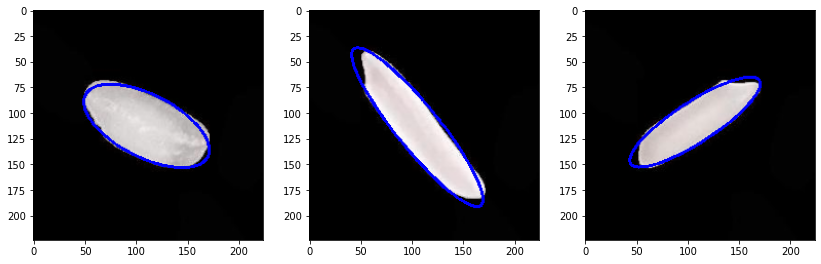

In [41]:
# Plot one example image of each rice species including the fitted ellipse

fig, ax = plt.subplots(1,3, figsize = (14,14))

indices = [0,100,200]# List of indices of images to show ellipse for

ax_index = 0

for i in indices:
    image = X[i]
    image_copy = image.copy()
    cv2.ellipse(image_copy, ellipses[i], (0, 0, 255), 2)
    ax[ax_index].imshow(image_copy)
    ax_index = ax_index+1
plt.show()

### Calculate Dimension feautures

In [42]:
def calculate_dimension_features(images, all_contours, ellipses):
    features = []
    contour_idx = 0
    for i, ellipse in enumerate(ellipses):
        major_axis_length = ellipse[1][1]
        minor_axis_length = ellipse[1][0]
        contour = all_contours[contour_idx // len(all_contours[0])][contour_idx % len(all_contours[0])]
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        roundness = 4 * np.pi * area / (perimeter**2)
        aspect_ratio = major_axis_length / minor_axis_length
        features.append({'Major Axis Length': major_axis_length, 'Minor Axis Length': minor_axis_length, 
                         'Area': area, 'Perimeter': perimeter, 'Roundness': roundness, 
                         'Aspect Ratio': aspect_ratio})
        contour_idx += 1
    return features

In [43]:
dimension_features = calculate_dimension_features(X, all_contours, ellipses)
dimension_features = pd.DataFrame(dimension_features)

### Gather all the features in one array or dataframe

In [44]:
training_data = pd.concat([df, color_feautures, dimension_features], axis = 1)

In [46]:
training_data.to_csv('../training_data/training_data.csv', index=False)

In [47]:
training_data.head()

,File Path,Class Label,mean_b,var_b,skew_b,kurt_b,entropy_b,mean_g,var_g,skew_g,...,var_r,skew_r,kurt_r,entropy_r,Major Axis Length,Minor Axis Length,Area,Perimeter,Roundness,Aspect Ratio
0,../data/Arborio\Arborio (14933).jpg,Arborio,205.674401,262.498011,-0.909070,1.217985,8.777595,200.856331,276.248720,-0.803981,...,270.032631,-0.810195,0.805220,8.777326,133.441330,60.906773,6362.5,339.948265,0.691850,2.190911
1,../data/Arborio\Arborio (133).jpg,Arborio,203.497150,284.742709,-0.580296,0.674240,8.459650,195.378299,269.207112,-0.538190,...,264.792012,-0.562535,0.630079,8.459627,104.786613,58.356579,4621.0,278.877196,0.746655,1.795626
2,../data/Arborio\Arborio (6841).jpg,Arborio,230.643763,294.394682,-1.719673,5.156673,8.599175,218.636597,275.804738,-1.529066,...,265.383521,-1.557814,4.783042,8.599174,116.863533,59.785782,5308.5,310.492422,0.691958,1.954704
3,../data/Arborio\Arborio (12232).jpg,Arborio,214.778695,266.586933,-1.995354,5.574856,8.290735,209.443611,253.149046,-1.934490,...,253.835840,-1.939199,5.518642,8.290765,95.900993,52.575989,3885.5,257.722869,0.735108,1.824045
4,../data/Arborio\Arborio (3255).jpg,Arborio,214.710690,228.991817,-0.798367,1.492634,8.663072,204.599138,244.126034,-0.625832,...,229.266961,-0.604124,0.707313,8.662762,120.750076,59.707272,5666.0,313.220343,0.725749,2.022368
